In [106]:
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [107]:
def showImage(src):
    img=mpimg.imread(src)
    imgplot = plt.imshow(img)
    plt.show()

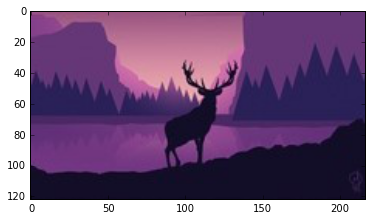

In [108]:
camera = io.imread("deer1.jpg",as_gray = True)
showImage("deer1.jpg")

In [109]:
type(camera)
print(camera.shape)
#first one height, second one width

(122, 217, 3)


In [110]:
rowNum = camera.shape[0]
colNum = camera.shape[1]
print(rowNum,"\n", colNum)       

122 
 217


In [111]:
def getHeightWidthOFTransformedImage(transFormationMatrix,oldShape):
    newH = oldShape[0] - abs(transFormationMatrix[0][2])
    newW = oldShape[1] - abs(transFormationMatrix[1][2])
    print("H = ",newH)
    print("W = ",newW)
    return newH, newW

H =  112
W =  167


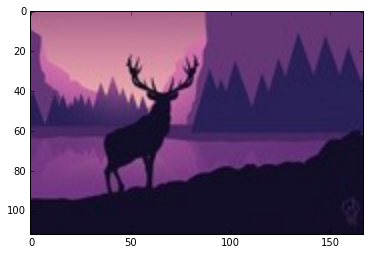

In [112]:
transFormationMatrix = np.int32([[1,0,-10],[0,1,-50]])
newH, newW = getHeightWidthOFTransformedImage(transFormationMatrix, camera.shape)

transformedImage = np.empty([newH, newW, 3], dtype= int)
transformedImage.fill(0)
io.imsave('transformedImage.png', transformedImage)

for x in range(0, rowNum):
    for y in range(0, colNum):
        originalPoint = np.int32([x,y,1])
        newPoint = transFormationMatrix.dot(originalPoint)
        newx = newPoint[0]
        newy = newPoint[1] 
        if newx < newH and newy < newW and newx >=0 and newy >= 0:
            transformedImage[newx][newy] =camera[x][y]
io.imsave('transformedImage.png', transformedImage)
showImage('transformedImage.png')
